In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

from sklearn.manifold import TSNE
from sklearn.cluster import HDBSCAN
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
qpes = np.loadtxt(os.getcwd()[:-19]+'feature_extraction/QPE_sim_lcsoft_dt250_feats.csv',delimiter=',')
qpeh = np.loadtxt(os.getcwd()[:-19]+'feature_extraction/QPE_sim_lchard_dt250_feats.csv',delimiter=',')
qpef = np.loadtxt(os.getcwd()[:-19]+'feature_extraction/QPE_sim_lcfull_dt250_feats.csv',delimiter=',')
npes = np.loadtxt(os.getcwd()[:-19]+'feature_extraction/nPE_sim_lcsoft_dt250_feats.csv',delimiter=',')
npeh = np.loadtxt(os.getcwd()[:-19]+'feature_extraction/nPE_sim_lchard_dt250_feats.csv',delimiter=',')
npef = np.loadtxt(os.getcwd()[:-19]+'feature_extraction/nPE_sim_lcfull_dt250_feats.csv',delimiter=',')

In [3]:
qpe_feats = np.concatenate((qpef,qpes,qpeh),axis=1)
npe_feats = np.concatenate((npef,npes,npeh),axis=1)

all_feats = np.concatenate((qpe_feats,npe_feats))

In [4]:
tsne_transform = TSNE().fit_transform(all_feats)

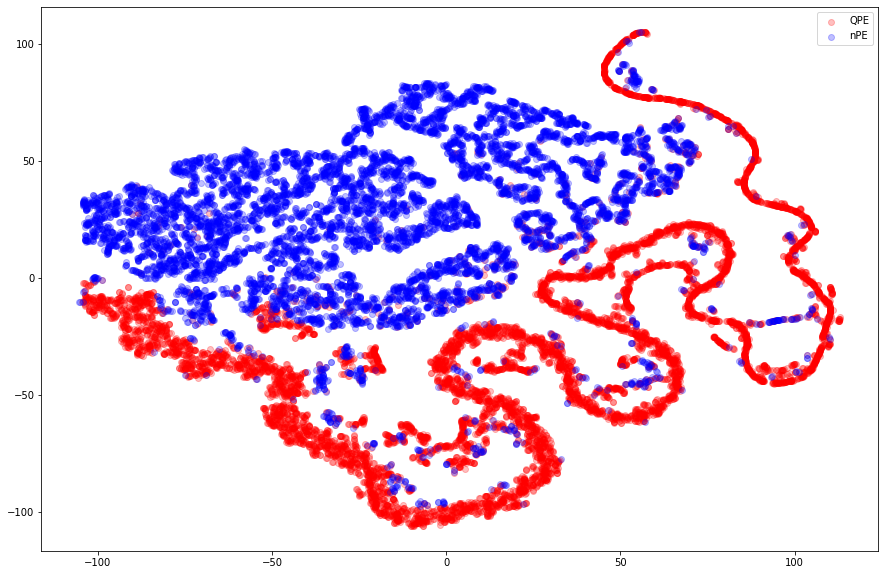

In [5]:
plt.scatter(tsne_transform[:10000,0],tsne_transform[:10000,1],alpha=0.25,color='r',label='QPE')
plt.scatter(tsne_transform[10000:,0],tsne_transform[10000:,1],alpha=0.25,color='b',label='nPE')
plt.legend(loc='upper right')
plt.show()

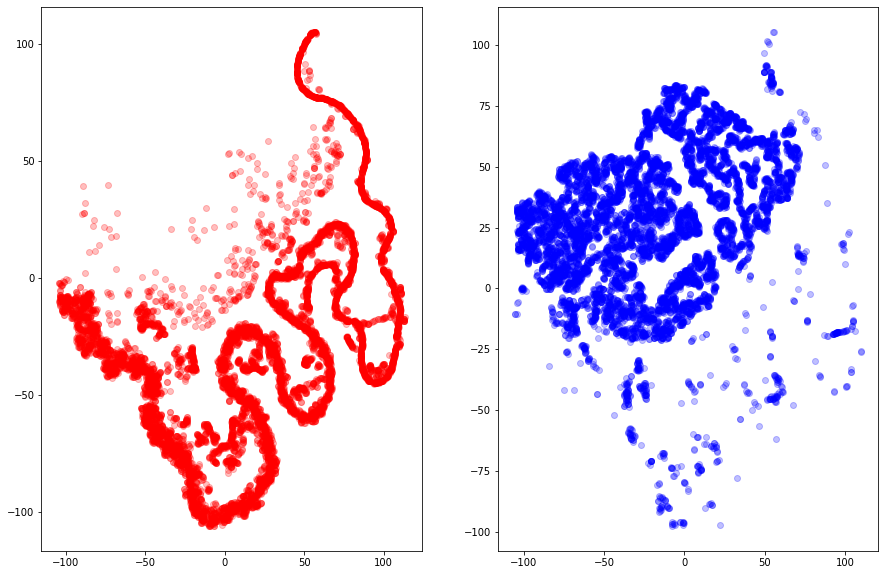

In [6]:
fig, axs = plt.subplots(1,2)
axs[0].scatter(tsne_transform[:10000,0],tsne_transform[:10000,1],alpha=0.25,color='r')
axs[1].scatter(tsne_transform[10000:,0],tsne_transform[10000:,1],alpha=0.25,color='b')
plt.show()

In [7]:
hdb_clust = HDBSCAN(min_cluster_size=20)
hdb_clust.fit(all_feats)
print(max(hdb_clust.labels_))

11


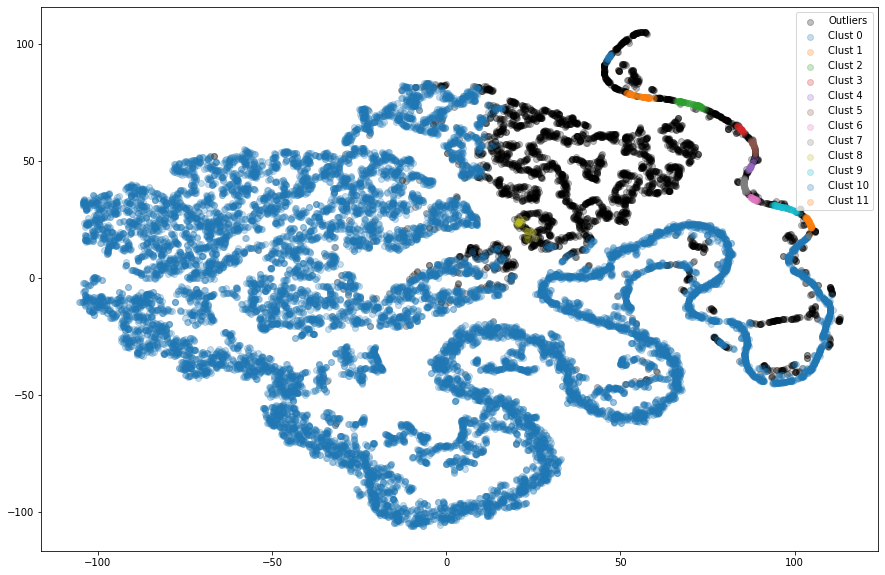

In [8]:
plt.scatter(tsne_transform[np.where(hdb_clust.labels_ == -1)[0],0],tsne_transform[np.where(hdb_clust.labels_ == -1)[0],1],alpha=0.25,color='k',label='Outliers')
for i in range(12):
    clust_idxs = np.where(hdb_clust.labels_ == i)
    plt.scatter(tsne_transform[clust_idxs,0],tsne_transform[clust_idxs,1],alpha=0.25,label='Clust '+str(i))
plt.legend(loc='upper right')
plt.show()
